In [1]:
import numpy as np
import matplotlib.pyplot as plt


# create a function to plot SVC decision boundary
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    x0 = np.linspace(xmin,xmax,100)
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x1 = -w[0]/w[1] * x0 - b/w[1]
    
    margin_diff = 1/w[1]
    
    upper = x1 + margin_diff
    lower = x1 - margin_diff
    
    plt.plot(x0,x1,"k-")
    plt.plot(x0,upper,"k--")
    plt.plot(x0,lower,"k--")
    
    # plot the supper vector points 
    svp = svm_clf.support_vectors_
    plt.scatter(svp[:,0], svp[:,1], s=180, c='#FFAAAA')
    
    
def plot_nonlinear_boundary(svm_clf_pipeline, axes):
    x0s = np.linspace(axes[0],axes[1], 100)
    x1s = np.linspace(axes[2],axes[3], 100)
    x0, x1 = np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(),x1.ravel()]
    y_pred = svm_clf_pipeline.predict(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)
    
    

def plot_svm_reg_boundary(svm_model, minX, maxX):
    X_new = np.linspace(minX,maxX,50).reshape(50,1)
    y_hat = svm_model.predict(X_new)
    y_upper = y_hat + svm_model.epsilon
    y_lower = y_hat - svm_model.epsilon
    plt.plot(X_new, y_hat, "k-")
    plt.plot(X_new, y_upper, "k--")
    plt.plot(X_new, y_lower, "k--")
    
    svp = svm_reg.support_
   
    plt.scatter(X[svp],y[svp], s=180, c="#FFAAAA")

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()

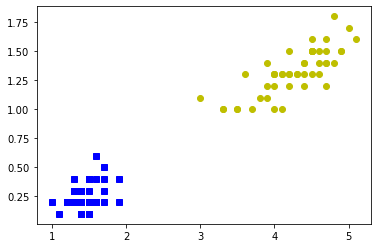

In [3]:
X= iris.data[:,2:][iris.target !=2]
y=iris.target[iris.target !=2]

plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
plt.plot(X[:,0][y==1],X[:,1][y==1],"yo")

In [4]:
from sklearn.preprocessing import StandardScaler

std_scaler =StandardScaler()
std_scaler.fit_transform(X)

array([[-1.01297765, -1.04211089],
       [-1.01297765, -1.04211089],
       [-1.08231219, -1.04211089],
       [-0.94364311, -1.04211089],
       [-1.01297765, -1.04211089],
       [-0.80497402, -0.68644165],
       [-1.01297765, -0.86427627],
       [-0.94364311, -1.04211089],
       [-1.01297765, -1.04211089],
       [-0.94364311, -1.21994552],
       [-0.94364311, -1.04211089],
       [-0.87430856, -1.04211089],
       [-1.01297765, -1.21994552],
       [-1.22098127, -1.21994552],
       [-1.15164673, -1.04211089],
       [-0.94364311, -0.68644165],
       [-1.08231219, -0.68644165],
       [-1.01297765, -0.86427627],
       [-0.80497402, -0.86427627],
       [-0.94364311, -0.86427627],
       [-0.80497402, -1.04211089],
       [-0.94364311, -0.68644165],
       [-1.29031581, -1.04211089],
       [-0.80497402, -0.50860702],
       [-0.66630494, -1.04211089],
       [-0.87430856, -1.04211089],
       [-0.87430856, -0.68644165],
       [-0.94364311, -1.04211089],
       [-1.01297765,

In [5]:
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear",random_state=42)
svm_clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

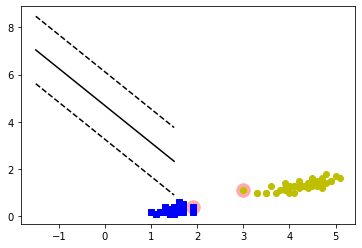

In [6]:
plot_svc_decision_boundary(svm_clf,-1.5,1.5)
plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
plt.plot(X[:,0][y==1],X[:,1][y==1],"yo")

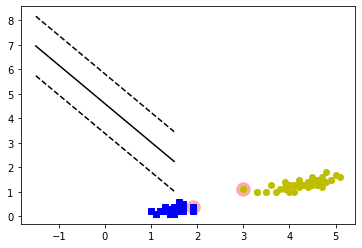

In [7]:
svm_clf = SVC(kernel="linear",C=100,random_state=42)
svm_clf.fit(X,y)
plot_svc_decision_boundary(svm_clf,-1.5,1.5)
plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
plt.plot(X[:,0][y==1],X[:,1][y==1],"yo")

In [8]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,noise=0.15,random_state=42)

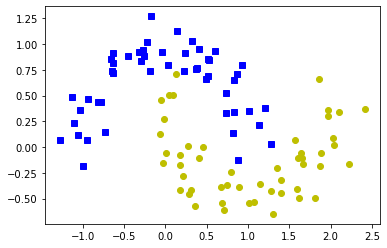

In [9]:
plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
plt.plot(X[:,0][y==1],X[:,1][y==1],"yo")

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
svm_pipeline = Pipeline([
    ("std_scaler",StandardScaler()),
    ("poly_feature",PolynomialFeatures(degree=3)),
    ("svm_clf",SVC(kernel="linear",random_state=42))
])

svm_pipeline.fit(X,y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly_feature',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('svm_clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=42, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

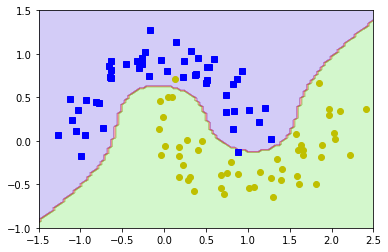

In [11]:
plot_nonlinear_boundary(svm_pipeline,axes=[-1.5,2.5,-1.0,1.5])
plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
plt.plot(X[:,0][y==1],X[:,1][y==1],"yo")

In [12]:
svm_pipeline = Pipeline([
    ("std_scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",degree=3,gamma=0.9,random_state=42))
])
svm_pipeline.fit(X,y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.9,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=42, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

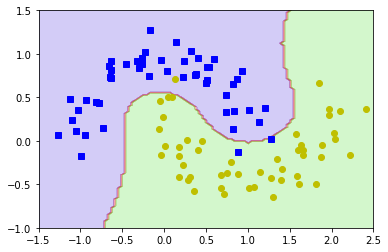

In [13]:
plot_nonlinear_boundary(svm_pipeline,axes=[-1.5,2.5,-1.0,1.5])
plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
plt.plot(X[:,0][y==1],X[:,1][y==1],"yo")

In [14]:
np.random.seed(42)

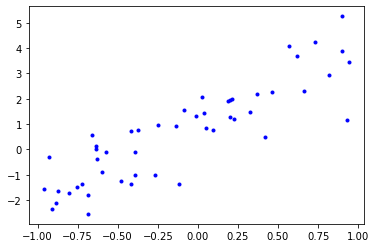

In [15]:
m = 50
X = 2 * np.random.rand(m,1) - 1
y = 3 * X + 1 + np.random.randn(m,1)
y = y.ravel()
plt.plot(X,y,"b.")

In [16]:
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear",epsilon=1)
svm_reg.fit(X,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

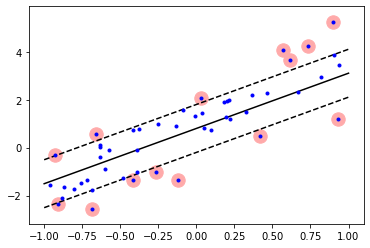

In [19]:
plot_svm_reg_boundary(svm_reg,-1,1)
plt.plot(X,y,"b.") #detect outliers when using svm regression